# 4. 데이터 표현과 특성 공학(Feature Engineering)
## 4.1 범주형 변수
### 4.1.1 원-핫-인코딩(가변수)
* one-hot-encoding, one-out-of-N_encoding, dummy variable

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import sklearn
import scipy
%matplotlib inline
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.size'] = 12.0

In [2]:
import pandas as pd
import os

In [3]:
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'),
    header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
          'marital-status', 'occupation', 'relationship', 'race', 'gender',
          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
          'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
            'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print(data.education.value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [6]:
print(data.workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [7]:
print(data.occupation.value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [8]:
print('원본 특성:\n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('get_dummies() 후의 특성:\n', list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies() 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation

In [9]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
data_dummies.shape

(32561, 46)

In [11]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape: {}, y_shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 44), y_shape: (32561,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)
print('테스트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


### 4.1.2 숫자로 표현된 범주형 특성

In [13]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1], '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [14]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [15]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 구간 분할, 이산화, 선형 모델, 트리 모델

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [17]:
X.shape

(100, 1)

In [18]:
y.shape

(100,)

In [19]:
line.shape

(1000, 1)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


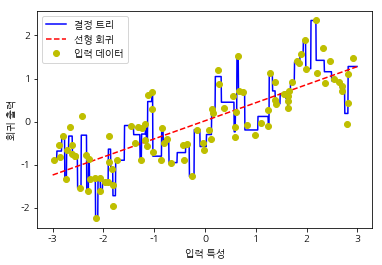

In [20]:
dt_reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, dt_reg.predict(line), c='b', label='결정 트리')

lin_reg = LinearRegression().fit(X, y)
plt.plot(line, lin_reg.predict(line), 'r--', label='선형 회귀')

plt.plot(X[:,0], y, 'o', c='y', label='입력 데이터')

plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [21]:
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)
print('\n데이터 포인트:\n{}'.format(X[:5]))
print('\n데이터 포인트의 소속 구간:\n{}'.format(which_bin[:5]))


데이터 포인트:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
print('X_binned.shape: {}'.format(X_binned.shape))

X_binned.shape: (100, 10)


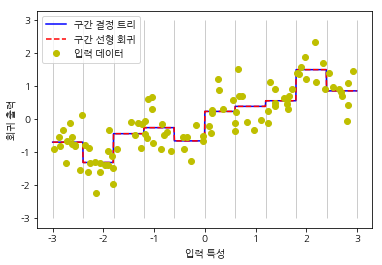

In [24]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

dt_reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dt_reg.predict(line_binned), c='b', label='구간 결정 트리')

lin_reg = LinearRegression().fit(X_binned, y)
plt.plot(line, lin_reg.predict(line_binned), 'r--', label='구간 선형 회귀')

plt.plot(X[:,0], y, 'o', c='y', label='입력 데이터')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

## 4.3 상호작용과 다항식

In [25]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


Text(0.5, 0, '입력 특성')

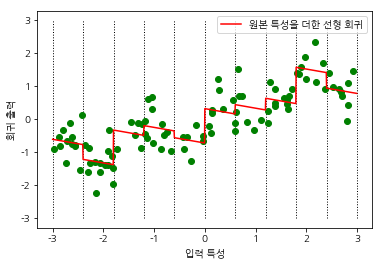

In [26]:
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='g')

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), c='r', label='원본 특성을 더한 선형 회귀')

plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

In [27]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [28]:
X_product[:1,:]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

In [29]:
X[:1,:]

array([[-0.75275929]])

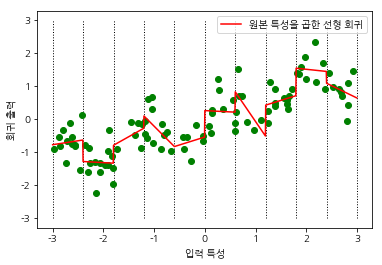

In [30]:
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='g')

reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), c='r', label='원본 특성을 곱한 선형 회귀')

plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [32]:
print('X_poly.shape: {}'.format(X_poly.shape))

X_poly.shape: (100, 10)


In [33]:
print('X 원소:\n{}'.format(X[:5]))
print('X_poly 원소:\n{}'.format(X_poly[:5]))

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [34]:
print('항 이름"\n{}'.format(poly.get_feature_names()))

항 이름"
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


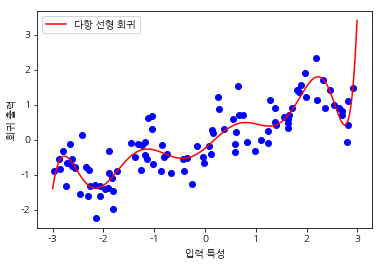

In [35]:
plt.plot(X[:,0], y, 'o', c='b')

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), c='r', label='다항 선형 회귀')

plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

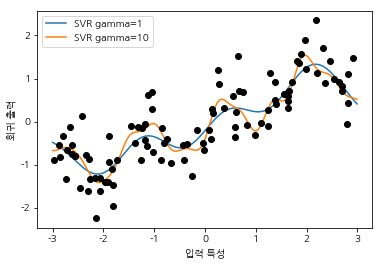

In [36]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [37]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_poly.shape: {}'.format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [38]:
print('다항 특성 이름:\n{}'.format(poly.get_feature_names()))

다항 특성 이름:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.774


## 4.4 일변량 비선형 변환

In [41]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
y = np.dot(X_org, w)

In [42]:
X_org_df = pd.DataFrame(X_org)
w_df = pd.DataFrame(w)
y_df = pd.DataFrame(y)
print('X_org[:5] :'); display(X_org_df[:5])
print('w :'); display(w_df)
print('y[:5] :'); display(y_df[:5])

X_org[:5] :


,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219
3,0.410599,0.144044,1.454274
4,0.761038,0.121675,0.443863


w :


,0
0,1.593274
1,0.568722
2,-0.114487


y[:5] :


,0
0,2.926144
1,4.744364
2,1.439488
3,0.569621
4,1.230924


In [43]:
X = rnd.poisson(10 * np.exp(X_org))
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [44]:
X.shape

(1000, 3)

In [45]:
X_df = pd.DataFrame(X)
display(X_df[:5])

,0,1,2
0,56,18,27
1,81,57,3
2,25,9,11
3,20,13,30
4,27,13,13


In [46]:
print('특성 출현 회수:\n{}'.format(np.bincount(X[:, 0])))

특성 출현 회수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


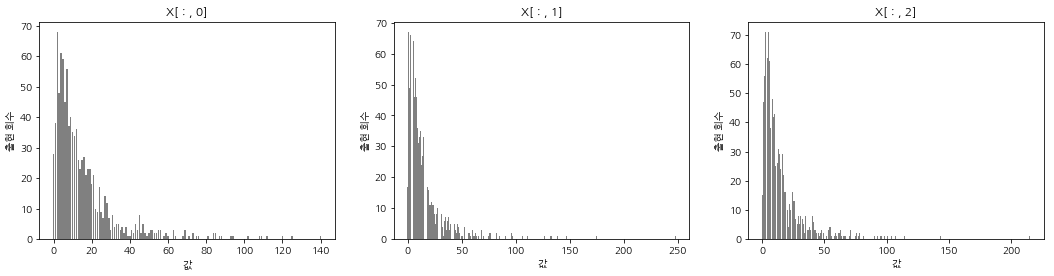

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for ax, x_axis in zip(axes.ravel(), [0, 1, 2]):
    bins = np.bincount(X[:, x_axis])
    ax.bar(range(len(bins)), bins, color='grey')
    ax.set_title('X[ : , {}]'.format(x_axis))
    ax.set_ylabel('출현 회수')
    ax.set_xlabel('값')

In [48]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.622


Text(0.5, 0, '값')

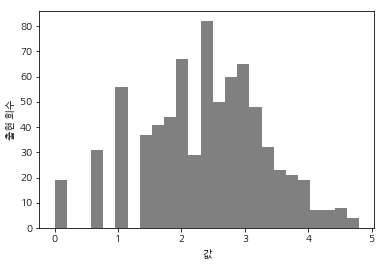

In [49]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel('출현 회수')
plt.xlabel('값')

In [50]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.875


## 4.5 특성 자동 선택
### 4.5.1 일변량 통계(univariate statistic)

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('cancer.data.shape: {}'.format(cancer.data.shape))
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

cancer.data.shape: (569, 30)
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, '특성 번호')

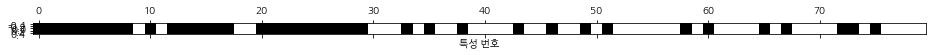

In [52]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')

In [53]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression(solver='liblinear', max_iter=10000)
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수: {:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('선택된 일부 특성을 사용한 점수: {:.3f}'.format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


### 4.5.2 모델 기반 특성 선택(model-based selection)

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, '특성 번호')

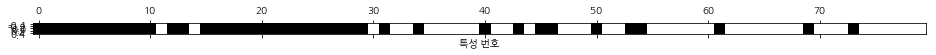

In [55]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')

In [56]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver='liblinear', max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.951


### 4.5.3 반복적 특성 선택

Text(0.5, 0, '특성 번호')

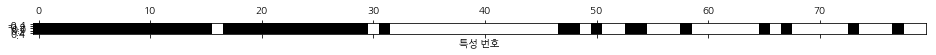

In [57]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')

In [58]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

secore = LogisticRegression(solver='liblinear', max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.951


In [59]:
print('RFE 테스트 점수: {:.3f}'.format(select.score(X_test, y_test)))
print('모델 테스트 점수: {:.3f}'.format(LogisticRegression(solver='liblinear', max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)))

RFE 테스트 점수: 0.951
모델 테스트 점수: 0.951


## 4.6 전문가 지식 활용

In [60]:
citibike = mglearn.datasets.load_citibike()
print('시티바이크 데이터:\n{}'.format(citibike.head()))

시티바이크 데이터:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


```
def load_citibike():
    data_mine = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "citibike.csv"))
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one
```

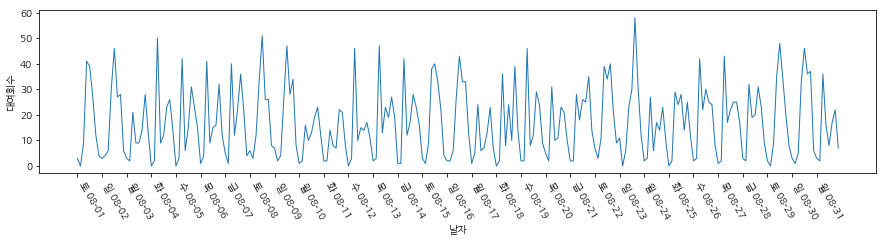

In [61]:
plt.figure(figsize=(15,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ['일', '월', '화', '수', '목', '금', '토']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'), xticks.strftime(' %m-%d'))]

plt.xticks(xticks, xticks_name, rotation=300, ha='left')
plt.xlabel('날자')
plt.ylabel('대여회수')
plt.plot(citibike, linewidth=1)

In [62]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1, 1) // 10 ** 9    # // 연산자는 나눗셈의 몫

In [63]:
n_train = 184     # 1달 데이터 중 23일 * 8개(3시간에 1개)를 Train 데이터로 분할. 나머지 8일치(64개)는 Test 데이터

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print('테스트 세트 R^2: {:.3f}'.format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(15,3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=60, ha='right')
    plt.plot(range(n_train), y_train, label='훈련')
    plt.plot(range(n_train, n_train + len(y_test)), y_test, label='테스트')
    plt.plot(range(n_train), y_pred_train, '--', label='훈련 예측')
    plt.plot(range(n_train, n_train + len(y_test)), y_pred, '--', label='테스트 예측')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('날자')
    plt.ylabel('대여회수')

테스트 세트 R^2: -0.035


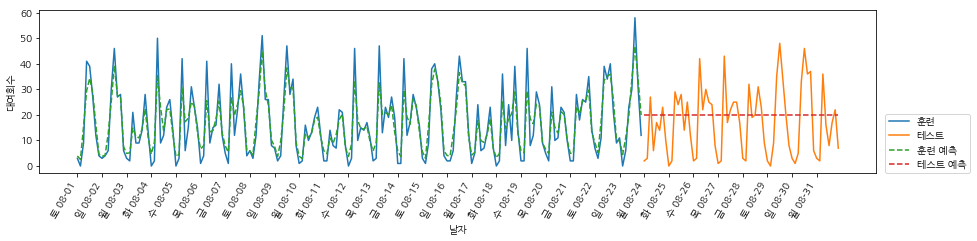

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

테스트 세트 R^2: 0.600


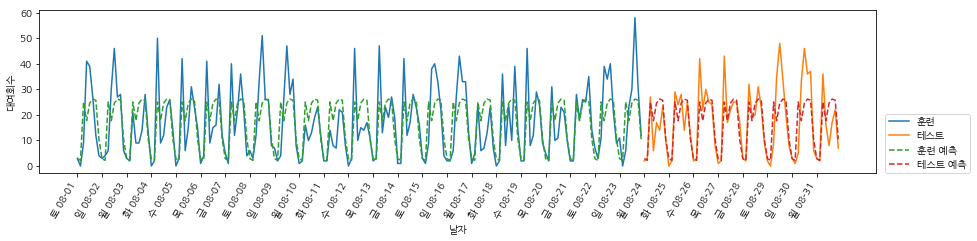

In [65]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.842


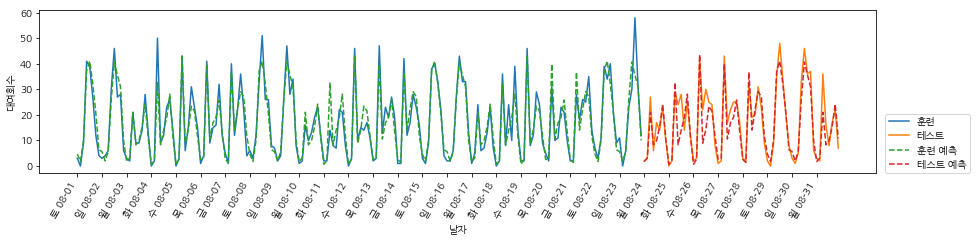

In [66]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1), citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.132


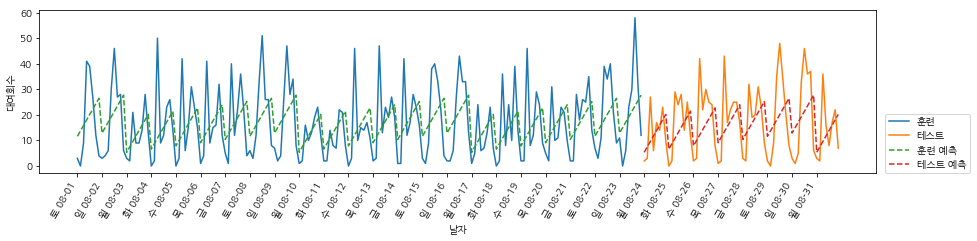

In [67]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [68]:
enc = OneHotEncoder(categories='auto')
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.622


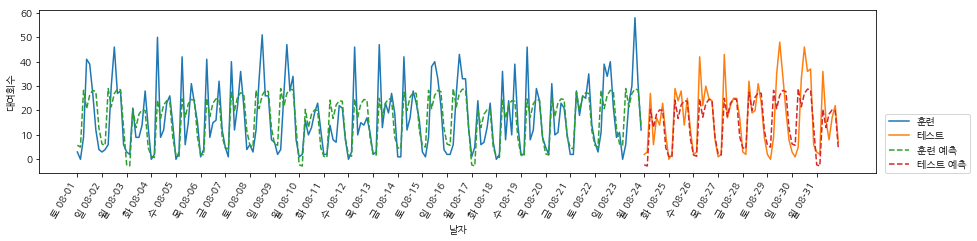

In [69]:
eval_on_features(X_hour_week_onehot, y , LinearRegression())

테스트 세트 R^2: 0.845


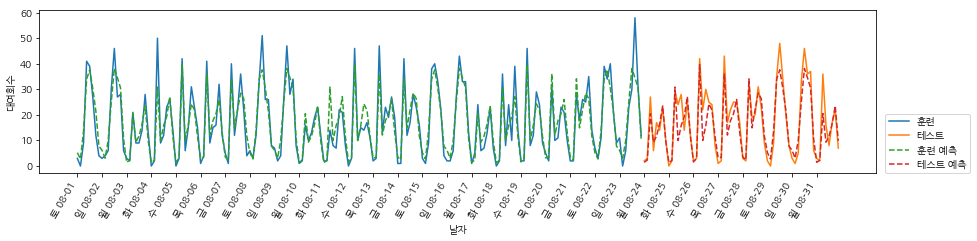

In [70]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [71]:
np.array(poly_transformer.get_feature_names()).reshape(1,-1)

array([['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
        'x10', 'x11', 'x12', 'x13', 'x14', 'x0 x1', 'x0 x2', 'x0 x3',
        'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10',
        'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x1 x2', 'x1 x3',
        'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10',
        'x1 x11', 'x1 x12', 'x1 x13', 'x1 x14', 'x2 x3', 'x2 x4',
        'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11',
        'x2 x12', 'x2 x13', 'x2 x14', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7',
        'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13',
        'x3 x14', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10',
        'x4 x11', 'x4 x12', 'x4 x13', 'x4 x14', 'x5 x6', 'x5 x7',
        'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13',
        'x5 x14', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11',
        'x6 x12', 'x6 x13', 'x6 x14', 'x7 x8', 'x7 x9', 'x7 x10',
        'x7 x11', 'x7 x12', 'x7 x13',

In [72]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['월', '화', '수', '목', '금', '토', '일']
features = day + hour

In [73]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

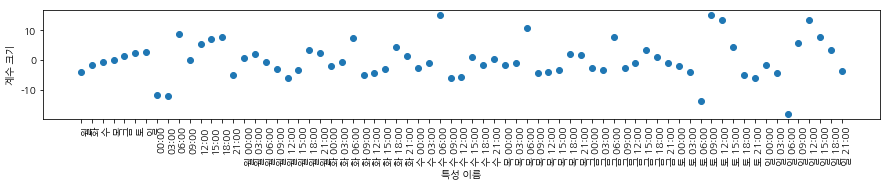

In [74]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90, ha='left')
plt.xlabel('특성 이름')
plt.ylabel('계수 크기')

테스트 세트 R^2: 0.845


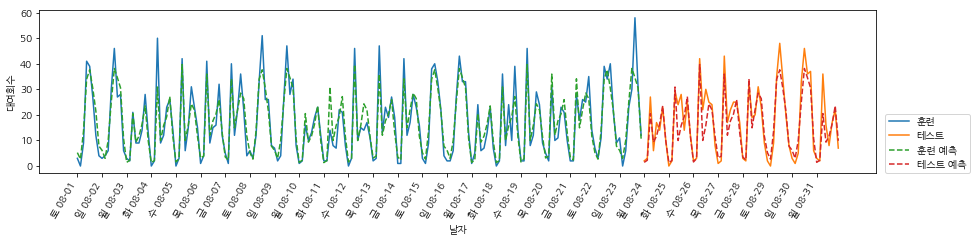

In [75]:
# 다항식 추가로 Fearures가 120개가 되었지만, 실제는 70개의 중요한 Features만으로도 동일한 성능을 나타냄
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select=70)
X_hour_week_onehot_poly_select = select.fit_transform(X_hour_week_onehot_poly, y)

lr = Ridge()
eval_on_features(X_hour_week_onehot_poly_select, y, lr)